In [1]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [2]:
!pip install konlpy
from konlpy.tag import Okt

# 1. 네이버 영화 리뷰 데이터에 대한 이해와 전처리

In [3]:
import matplotlib.pyplot as plt
import re
import pandas as pd
import numpy as np
from tqdm import tqdm

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/hongsukyi/Lectures/main/data/naver_movie_train.txt", sep="\t")

In [5]:
df.head()


,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150000 entries, 0 to 149999
Data columns (total 3 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        150000 non-null  int64 
 1   document  149995 non-null  object
 2   label     150000 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 3.4+ MB


In [7]:
df=df[:5000]; len(df)

5000

<Axes: xlabel='label'>

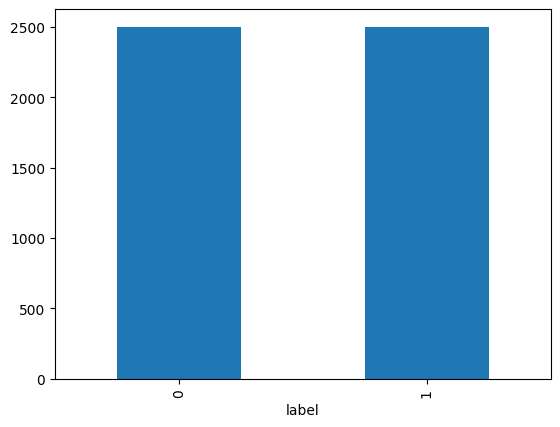

In [8]:
df['label'].value_counts().plot(kind = 'bar')

In [9]:
df['document'] = df['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]",""); df.head()

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1


In [10]:
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [11]:
okt = Okt()
df_token = []
for sentence in tqdm(df['document']):
    tokenized_sentence = okt.morphs(sentence, stem=True) # 토큰화
    stopwords_removed_sentence = [word for word in tokenized_sentence if not word in stopwords] # 불용어 제거
    df_token.append(stopwords_removed_sentence)

100%|█████████████████████████████████████████████████████████████████████████████| 5000/5000 [00:20<00:00, 246.36it/s]


In [12]:
vocab_size = 6000
tokenizer = Tokenizer(vocab_size)
tokenizer.fit_on_texts(df_token)

In [13]:
df_token = tokenizer.texts_to_sequences(df_token)
print(tokenizer.word_counts.items())

odict_items([('아', 137), ('더빙', 12), ('..', 960), ('진짜', 292), ('짜증나다', 40), ('목소리', 9), ('흠', 11), ('...', 779), ('포스터', 22), ('보고', 158), ('초딩', 15), ('영화', 1685), ('줄', 43), ('....', 184), ('오버', 5), ('연기', 213), ('조차', 7), ('가볍다', 14), ('않다', 231), ('너', 26), ('무재', 5), ('밓었', 1), ('다그', 1), ('래서', 1), ('보다', 1348), ('추천', 38), ('다', 333), ('교도소', 1), ('이야기', 73), ('구먼', 1), ('솔직하다', 47), ('재미', 128), ('없다', 545), ('평점', 210), ('조정', 2), ('사이', 5), ('몬페', 1), ('그', 167), ('익살스럽다', 1), ('돋보이다', 9), ('!', 248), ('스파이더맨', 10), ('에서', 227), ('늙다', 4), ('보이다', 29), ('커스틴', 2), ('던스트', 1), ('너무나도', 11), ('이쁘다', 35), ('막', 13), ('걸음', 2), ('마', 6), ('떼다', 11), ('3', 69), ('세', 25), ('부터', 54), ('초등학교', 6), ('1', 160), ('학년', 7), ('생인', 2), ('8', 16), ('살다', 44), ('.', 2343), ('ㅋㅋㅋ', 76), ('별', 66), ('반개', 13), ('아깝다', 159), ('움', 41), ('원작', 37), ('긴장감', 26), ('을', 776), ('제대로', 21), ('살리다', 19), ('욕', 39), ('나오다', 230), ('이응경', 1), ('길용우', 1), ('연', 27), ('기', 81), ('생활', 4), ('몇', 26), 

In [14]:
df_token[:2]

[[63, 725, 4, 19, 244, 923],
 [797, 5, 429, 51, 600, 2, 223, 39, 1443, 31, 1122, 643, 26]]

In [15]:
y_train = np.array(df['label']); y_train[:2]

array([0, 1])

In [16]:
print(len(df_token))
print(len(y_train))

5000
5000


In [17]:
# 전체 데이터의 길이는 30으로 맞춘다.
max_len = 50
df_pad = pad_sequences(df_token, maxlen = max_len)

In [18]:
df_pad.shape

(5000, 50)

In [19]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df_pad, y_train, test_size=0.2, shuffle=True, stratify=y_train)

In [20]:
X_train.shape, y_train.shape

((4000, 50), (4000,))

# 2. LSTM으로 네이버 영화 리뷰 감성 분류하기

In [21]:
from tensorflow.keras.layers import Embedding, Dense, SimpleRNN, LSTM, GRU, Conv1D, GlobalMaxPooling1D
from tensorflow.keras.models import Sequential

In [22]:
num_embeddings = 100
num_hiddens = 64

num_filters = 64 # 커널의 수
kernel_size = 3  # 커널의 크기

In [23]:
dnn_model = Sequential([Embedding(vocab_size, num_embeddings ),
                        GlobalMaxPooling1D(),
                        Dense(num_hiddens),
                        Dense(1, activation='sigmoid')
                        ])

In [24]:
rnn_model = Sequential([Embedding(vocab_size, num_embeddings ),
                        SimpleRNN(num_hiddens),
                        Dense(1, activation='sigmoid')
                        ])

In [25]:
lstm_model = Sequential([Embedding(vocab_size, num_embeddings ),
                         LSTM(num_hiddens),
                         Dense(1, activation='sigmoid')
                         ])

In [26]:
gru_model = Sequential([Embedding(vocab_size, num_embeddings ),
                        LSTM(num_hiddens),
                        Dense(1, activation='sigmoid')
                        ])

In [27]:
cnn_model=Sequential([Embedding(vocab_size, num_embeddings ),
                      Conv1D(num_filters, kernel_size, padding='valid', activation='relu'),
                      GlobalMaxPooling1D(),
                      Dense(1, activation='sigmoid')
                      ])

In [28]:
models = {'DNN': dnn_model,
          'SimpleRNN': rnn_model,
          'LSTM': lstm_model,
          'GRU': gru_model,
          'CNN1D': cnn_model}

In [29]:
results = []
histories =[]
model_name=[]
for name, model in models.items():
    print(f'Traing {name} model ...')
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])
    history = model.fit(X_train, y_train, epochs=15, batch_size=64, validation_split=0.2)
    histories.append(history)
    results.append(model.evaluate(X_test, y_test))
    model_name.append(name)
    print(name, '테스트 정확도:', results[-1][1])


Traing DNN model ...
Epoch 1/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 3s 17ms/step - acc: 0.5466 - loss: 0.6887 - val_acc: 0.7400 - val_loss: 0.6489
Epoch 2/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.8537 - loss: 0.5737 - val_acc: 0.7800 - val_loss: 0.4938
Epoch 3/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - acc: 0.9039 - loss: 0.3171 - val_acc: 0.7900 - val_loss: 0.4719
Epoch 4/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9543 - loss: 0.1757 - val_acc: 0.7900 - val_loss: 0.5057
Epoch 5/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - acc: 0.9787 - loss: 0.1049 - val_acc: 0.7887 - val_loss: 0.5355
Epoch 6/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9894 - loss: 0.0579 - val_acc: 0.7887 - val_loss: 0.5778
Epoch 7/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9943 - loss: 0.0384 - val_acc: 0.7912 - val_loss: 0.6191
Epoch 8/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - acc: 0.9959 - loss: 0.0265 - val_acc: 0.7875 - val_loss: 0.6454
Epoch 9/15
50/50 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/s

In [30]:
def plot_model_comparision(histories, results, model_names):
    plt.figure(figsize=(20,8))
    plt.subplot(1,2,1)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['loss'], label=name)
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.title('Train Loss')
    plt.legend()

    plt.subplot(1,2,2)
    for history, name in zip(histories, model_names):
        plt.plot(history.history['acc'], label=name)
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.title('Train Accuracy')
    plt.legend()
    plt.show()


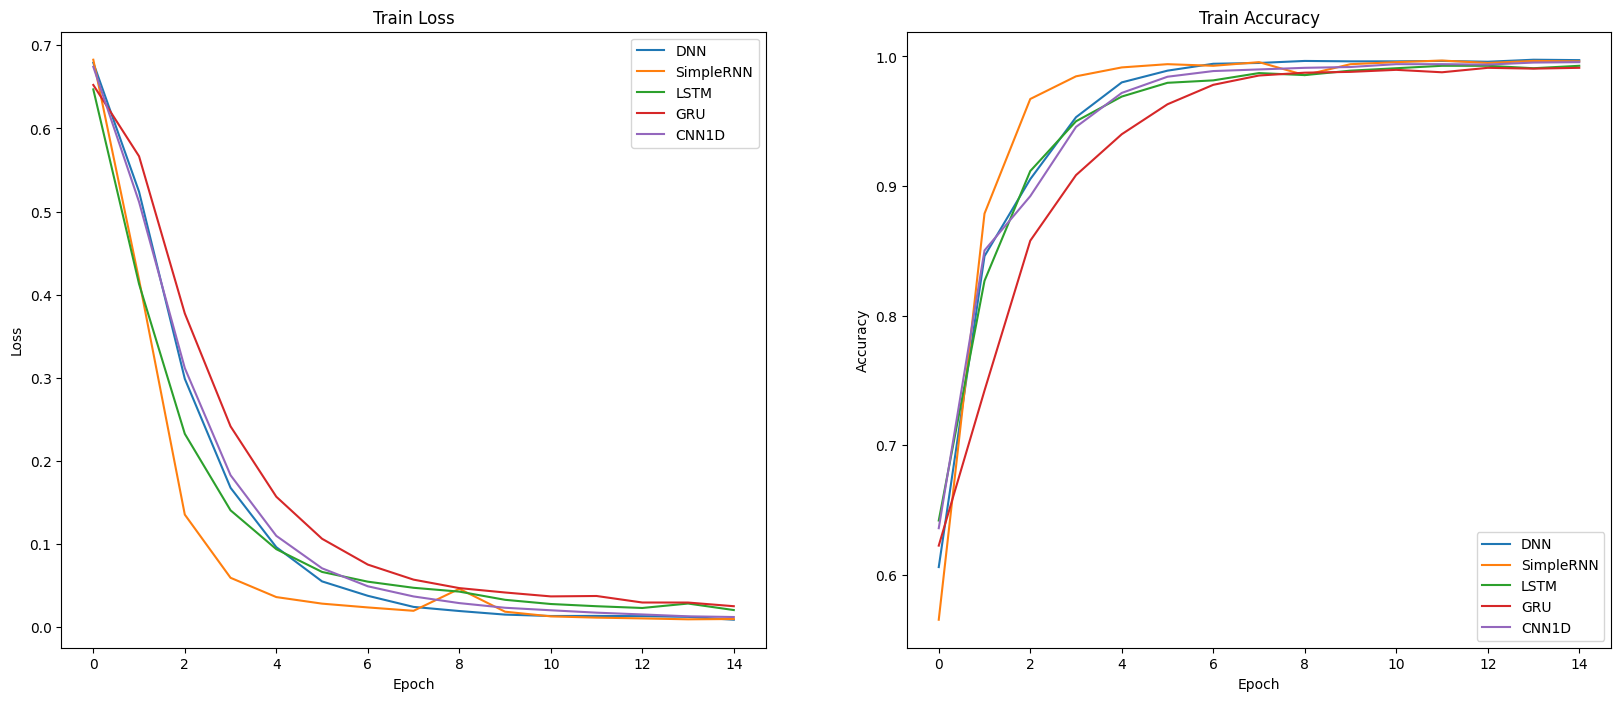

In [31]:
plot_model_comparision(histories, results, models)

In [32]:
df1=pd.DataFrame(model_name); df1.head()
df1.columns=['model_name']; df1.head()

,model_name
0,DNN
1,SimpleRNN
2,LSTM
3,GRU
4,CNN1D


In [33]:
#col=['model_name','loss','accuracy']
df2=pd.DataFrame(results); df2.head()
df2.columns=['loss','accuracy']; df2.head()

,loss,accuracy
0,0.616342,0.801
1,0.929659,0.732
2,1.220670,0.757
3,1.189585,0.762
4,0.866495,0.777


In [34]:
df=pd.concat([df1,df2],axis=1); df.head()

,model_name,loss,accuracy
0,DNN,0.616342,0.801
1,SimpleRNN,0.929659,0.732
2,LSTM,1.220670,0.757
3,GRU,1.189585,0.762
4,CNN1D,0.866495,0.777


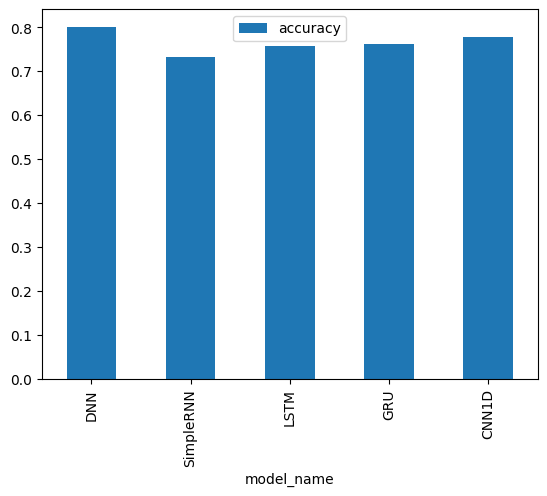

In [35]:
df.plot.bar(x='model_name',y='accuracy');

# 3. 리뷰 예측해보기

In [36]:
def sentiment_predict(new_sentence):
  new_sentence = re.sub(r'[^ㄱ-ㅎㅏ-ㅣ가-힣 ]','', new_sentence)
  new_sentence = okt.morphs(new_sentence, stem=True) # 토큰화
  new_sentence = [word for word in new_sentence if not word in stopwords] # 불용어 제거
  encoded = tokenizer.texts_to_sequences([new_sentence]) # 정수 인코딩
  pad_new = pad_sequences(encoded, maxlen = max_len) # 패딩
  score = float(model.predict(pad_new)) # 예측
  if(score > 0.5):
    print("{:.2f}% 확률로 긍정 리뷰입니다.\n".format(score * 100))
  else:
    print("{:.2f}% 확률로 부정 리뷰입니다.\n".format((1 - score) * 100))

In [37]:
sentiment_predict('이 영화 개꿀잼 ㅋㅋㅋ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 144ms/step
97.39% 확률로 긍정 리뷰입니다.



C:\Users\admin\AppData\Local\Temp\ipykernel_2664\55491159.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new)) # 예측


In [38]:
sentiment_predict('이 영화 핵노잼 ㅠㅠ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
100.00% 확률로 부정 리뷰입니다.



C:\Users\admin\AppData\Local\Temp\ipykernel_2664\55491159.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new)) # 예측


In [39]:
sentiment_predict('이딴게 영화냐 ㅉㅉ')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step
100.00% 확률로 부정 리뷰입니다.



C:\Users\admin\AppData\Local\Temp\ipykernel_2664\55491159.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new)) # 예측


In [40]:
sentiment_predict('감독 뭐하는 놈이냐?')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 58ms/step
99.73% 확률로 부정 리뷰입니다.



C:\Users\admin\AppData\Local\Temp\ipykernel_2664\55491159.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new)) # 예측


In [41]:
sentiment_predict('와 개쩐다 정말 세계관 최강자들의 영화다')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
77.96% 확률로 부정 리뷰입니다.



C:\Users\admin\AppData\Local\Temp\ipykernel_2664\55491159.py:7: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  score = float(model.predict(pad_new)) # 예측
